In [1]:
using PyCall
function dataprocessing()
    py"""
    import webbpsf
    nc = webbpsf.NIRCam()
    psf = nc.calc_psf(nlambda=5, fov_arcsec=2)
    a = psf[1].data
    """
    
    julia_array = convert(Array{Float64,2}, py"a")
    #julia_array = poisson(julia_array)
    rows, cols = size(julia_array)
    return julia_array, rows, cols
end


dataprocessing (generic function with 1 method)

In [2]:
star, r, c = dataprocessing()

([2.162435323335774e-6 2.501653454340874e-6 … 2.086406269169631e-6 1.696813589667094e-6; 1.4836658232327004e-6 2.784709288319623e-6 … 2.5787806119636184e-6 1.308505256332213e-6; … ; 2.877581050640406e-6 4.6372726892391834e-6 … 3.4840141014390183e-6 1.8701798738398946e-6; 3.3241076468775753e-6 2.8353118835471594e-6 … 2.8920341028621527e-6 2.575350338807949e-6], 64, 64)

In [14]:
let
    # cf. https://github.com/JuliaPlots/Makie.jl/issues/822#issuecomment-769684652
    # with scale argument that is required now
    struct LogMinorTicks end
    
    function MakieLayout.get_minor_tickvalues(::LogMinorTicks, scale, tickvalues, vmin, v    max)
        vals = Float64[]
        for (lo, hi) in zip(
                  @view(tickvalues[1:end-1]),
                  @view(tickvalues[2:end]))
                        interval = hi-lo
                        steps = log10.(LinRange(10^lo, 10^hi, 11))
            append!(vals, steps[2:end-1])
        end
        vals
    end
    custom_formatter(values) = map(v -> "10" * Makie.UnicodeFun.to_superscript(round(Int64, v    )), values)
      data = star
      fig = Figure()
      ax_a, hm = heatmap(fig[1, 1], log10.(data),
      axis=(; xminorticksvisible=true,
         xminorticks=IntervalsBetween(9)))
      ax_a.xlabel = "U"
      ax_a.ylabel = "V"
      cb = Colorbar(fig[1, 2], hm;
      tickformat=custom_formatter,
      minorticksvisible=true,
      minorticks=LogMinorTicks())
      ax_a.title = "Log Scale Model PSF"
      save(joinpath("outdir", "test.png"), fig)
  end




LoadError: syntax: missing comma or ) in argument list

In [5]:
using CairoMakie

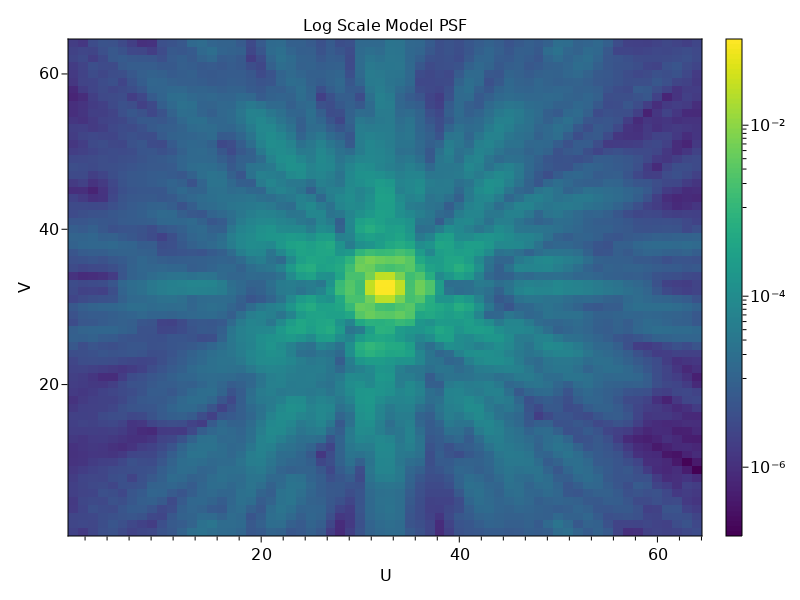

In [15]:
# in one Pluto.jl cell
using CairoMakie

# another Pluto.jl Cell
let
	# cf. https://github.com/JuliaPlots/Makie.jl/issues/822#issuecomment-769684652
	# with scale argument that is required now
	struct LogMinorTicks end
	
    function MakieLayout.get_minor_tickvalues(
			::LogMinorTicks, scale, tickvalues, vmin, vmax
	)
    	vals = Float64[]
    	for (lo, hi) in zip(
				@view(tickvalues[1:end-1]),
				@view(tickvalues[2:end])
			)
        	interval = hi-lo
        	steps = log10.(LinRange(10^lo, 10^hi, 11))
        	append!(vals, steps[2:end-1])
    	end
    	vals
	end
	
	custom_formatter(values) = map(
		v -> "10" * Makie.UnicodeFun.to_superscript(round(Int64, v)),
		values
	)
	
	
	data = star
	fig = Figure()
	ax_a, hm = heatmap(fig[1, 1], log10.(data),
		axis=(;
			   xminorticksvisible=true,
			   xminorticks=IntervalsBetween(9))
	         )
	cb = Colorbar(fig[1, 2], hm;
		tickformat=custom_formatter,
		minorticksvisible=true,
		minorticks=LogMinorTicks()
	)
    ax_a.xlabel = "U"
    ax_a.ylabel = "V"
	ax_a.title = "Log Scale Model PSF"
    save(joinpath("outdir", "test.png"), fig)
    fig
end